# Task

**Here is the background information on your task**

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

**Here is your task**

Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

Put together 2-3 slides summarising your most interesting findings to ANZ management.

# Init

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
%matplotlib inline
import seaborn as sns

# Load

In [2]:
df = pd.ExcelFile('ANZ synthesised transaction dataset.xlsx')

In [3]:
print(df.sheet_names)

['DSynth_Output_100c_3m_v3']


In [4]:
df = df.parse('DSynth_Output_100c_3m_v3')

# Check

In [5]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
df.describe(exclude='number')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885.0,12043,12043,12043,12043,7717,12043,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3.0,100,1,100,6,5725,80,91,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,2018-09-28 00:00:00,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,df076f64071446d6923dc3e0d9d354bf,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883.0,578,12043,578,3934,14,746,174,6285,255,2169,10,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing/Useless Values

In [9]:
df.isna().sum()[df.isna().sum() > 0]

card_present_flag     4326
bpay_biller_code     11158
merchant_id           4326
merchant_code        11160
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
dtype: int64

In [10]:
df[df['card_present_flag'].isna()]['status'].unique()

# THIS TYPE OF TXN DO NOT REQUIRE MERCHANT DATA

array(['posted'], dtype=object)

In [11]:
df[df['card_present_flag'].notna()]['status'].unique()

array(['authorized'], dtype=object)

In [12]:
df[df['card_present_flag'].isna()]['txn_description'].unique()

# THIS TYPE OF TXN DO NOT REQUIRE MERCHANT DATA

array(['PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK'], dtype=object)

In [13]:
df[df['card_present_flag'].notna()]['txn_description'].unique()

array(['POS', 'SALES-POS'], dtype=object)

In [14]:
df['merchant_code'].unique()

array([nan,  0.])

In [15]:
df[df['merchant_code'].notna()]['txn_description'].unique()

array(['PAY/SALARY'], dtype=object)

In [16]:
df[df['txn_description'] == 'PAY/SALARY']['merchant_code'].unique()

# ? NO USEFUL INFORMATION

array([0.])

In [17]:
df['bpay_biller_code'].unique()

array([nan, 0, ' THE DISCOUNT CHEMIST GROUP',
       ' LAND WATER & PLANNING East Melbourne'], dtype=object)

In [18]:
df[df['bpay_biller_code'] == ' THE DISCOUNT CHEMIST GROUP']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
3050,authorized,1.0,THE DISCOUNT CHEMIST GROUP,ACC-2681137560,AUD,151.11 -33.99,POS,786e2dcb-aa00-4a01-a8d7-7cff67fd69e1,NaN,Nathaniel,...,31,Bondi Junction,NSW,2018-08-25T09:17:31.000+0000,20.69,156aa5c521d649099523070b2a40e2e9,Australia,CUS-2083971310,151.25 -33.89,debit


In [19]:
df[df['bpay_biller_code'] == ' LAND WATER & PLANNING East Melbourne']

# THIS COLUMN ALSO SEEMS NOT USEFUL

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
4358,authorized,1.0,LAND WATER & PLANNING East Melbourne,ACC-80388494,AUD,144.97 -37.42,SALES-POS,bfac8fdf-39fb-4300-9267-0a7097d3f365,NaN,Dustin,...,28,East Melbourne,VIC,2018-09-04T09:42:51.000+0000,24.01,77dfd0ea900745819a25200f1194185b,Australia,CUS-1140341822,144.97 -37.81,debit


In [20]:
df.nunique()[df.nunique()==len(df)]

# THIS COLUMN IS REDUNDANT

transaction_id    12043
dtype: int64

In [21]:
df.nunique()[df.nunique()==1]

# THESE COLUMNS ARE USELESS

currency         1
merchant_code    1
country          1
dtype: int64

In [22]:
df.isna().sum()[df.isna().sum() > 0].index

Index(['card_present_flag', 'bpay_biller_code', 'merchant_id', 'merchant_code',
       'merchant_suburb', 'merchant_state', 'merchant_long_lat'],
      dtype='object')

In [23]:
df[['card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state', 'merchant_long_lat']] = df[['card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state', 'merchant_long_lat']].fillna(value=-1)

In [24]:
df = df.drop(columns=['merchant_code', 'bpay_biller_code', 'transaction_id', 'currency', 'country'])

In [25]:
df.isna().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

# Duplicate Values

In [26]:
df[df.duplicated(keep='first')]

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement


# Data Types & Validity

In [27]:
def separate_dtype(df):
    '''Function to separate columns based on their data type
       df = dataframe'''
    cats, nums, dates = [], [], []
    for col in df.columns:
        if df[col].dtype == 'O':
            cats.append(col)
        elif df[col].dtype in ['int64', 'float64', 'int32', 'float32']:
            nums.append(col)
        elif df[col].dtype in ['datetime64[ns]', 'datetime64[ns, UTC]', '<M8[ns]']:
            dates.append(col)
    return cats, nums, dates

In [28]:
cat_feats, num_feats, date_feats = separate_dtype(df)

In [29]:
def composition(col):
    return df[col].value_counts().apply(lambda x: str(round(x/df[col].value_counts().sum()*100, 2))+'%')

In [30]:
for feat in cat_feats:
    print(feat)
    print(composition(feat))
    print('\n')
    
# FIX LONG_LAT, EXTRACTION, MERCHANT_LONG_LAT TO CORRECT FORMATS/DTYPE

status
authorized    64.08%
posted        35.92%
Name: status, dtype: object


account
ACC-1598451071     4.8%
ACC-1222300524    2.52%
ACC-182446574     2.42%
ACC-4258502723    2.16%
ACC-1037050564    2.15%
                  ...  
ACC-1998563091    0.33%
ACC-3881031190    0.31%
ACC-721712940     0.28%
ACC-4059612845    0.26%
ACC-1217063613    0.21%
Name: account, Length: 100, dtype: object


long_lat
153.41 -27.95     4.8%
151.23 -33.94    2.52%
116.06 -32.00    2.42%
145.45 -37.74    2.16%
153.10 -27.66    2.15%
                 ...  
149.03 -35.25    0.33%
149.19 -21.15    0.31%
145.09 -37.82    0.28%
130.98 -12.49    0.26%
147.61 -37.82    0.21%
Name: long_lat, Length: 100, dtype: object


txn_description
SALES-POS     32.67%
POS           31.41%
PAYMENT       21.59%
PAY/SALARY     7.33%
INTER BANK     6.16%
PHONE BANK     0.84%
Name: txn_description, dtype: object


merchant_id
-1                                      35.92%
106e1272-44ab-4dcb-a438-dd98e0071e51     0.12%
6c84c219-96

In [31]:
df['long_lat'] = df['long_lat'].apply(lambda x: x.replace(' ', ', '))

In [32]:
df['extraction'] = pd.to_datetime(df['extraction'])

In [33]:
df['merchant_long_lat'] = [x.replace(' ',', ') if isinstance(x, str) else x for x in df['merchant_long_lat']]

In [34]:
cat_feats, num_feats, date_feats = separate_dtype(df)

In [35]:
df[num_feats].describe()

# CARD_PRESENT_FLAG IS ACTUALLY BINARY 0/1

,card_present_flag,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.155111,14704.195553,30.582330,187.933588
std,0.921709,31503.722652,10.046343,592.599934
min,-1.000000,0.240000,18.000000,0.100000
25%,-1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [36]:
df['card_present_flag'] = df['card_present_flag'].astype('O')

In [37]:
cat_feats, num_feats, date_feats = separate_dtype(df)

In [38]:
df[date_feats].describe()

# ALL VALUES ARE VALID AND WITHIN CORRECT DATA TYPE

,date,extraction
count,12043,12043
unique,91,9442
top,2018-09-28 00:00:00,2018-09-03 11:00:00+00:00
freq,174,10
first,2018-08-01 00:00:00,2018-08-01 01:01:15+00:00
last,2018-10-31 00:00:00,2018-10-31 23:59:44+00:00


In [39]:
print(f'{len(cat_feats)} categorical features: {cat_feats} \n{len(num_feats)} numerical features: {num_feats} \n{len(date_feats)} datetime features: {date_feats}')

13 categorical features: ['status', 'card_present_flag', 'account', 'long_lat', 'txn_description', 'merchant_id', 'first_name', 'gender', 'merchant_suburb', 'merchant_state', 'customer_id', 'merchant_long_lat', 'movement'] 
3 numerical features: ['balance', 'age', 'amount'] 
2 datetime features: ['date', 'extraction']


# Feature Engineering

In [40]:
df['day'] = df['date'].apply(lambda x: x.weekday())
df['day'] = df['day'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [41]:
df['weekend'] = df['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [42]:
df['month'] = df['date'].apply(lambda x: x.month)
df['month'] = df['month'].map({8: 'August', 9: 'September', 10: 'October'})

In [43]:
df['debit'] = df.apply(lambda row: row['amount'] if row['movement']=='debit' else 0, axis=1)
df['credit'] = df.apply(lambda row: row['amount'] if row['movement']=='credit' else 0, axis=1)

In [44]:
df['week'] = df['date'].apply(lambda x: f'Week {x.week}')

In [45]:
cat_feats, num_feats, date_feats = separate_dtype(df)

In [46]:
for feat in cat_feats:
    print(feat)
    print(composition(feat))
    print('\n')

status
authorized    64.08%
posted        35.92%
Name: status, dtype: object


card_present_flag
 1.0    51.43%
-1.0    35.92%
 0.0    12.65%
Name: card_present_flag, dtype: object


account
ACC-1598451071     4.8%
ACC-1222300524    2.52%
ACC-182446574     2.42%
ACC-4258502723    2.16%
ACC-1037050564    2.15%
                  ...  
ACC-1998563091    0.33%
ACC-3881031190    0.31%
ACC-721712940     0.28%
ACC-4059612845    0.26%
ACC-1217063613    0.21%
Name: account, Length: 100, dtype: object


long_lat
153.41, -27.95     4.8%
151.23, -33.94    2.52%
116.06, -32.00    2.42%
145.45, -37.74    2.16%
153.10, -27.66    2.15%
                  ...  
149.03, -35.25    0.33%
149.19, -21.15    0.31%
145.09, -37.82    0.28%
130.98, -12.49    0.26%
147.61, -37.82    0.21%
Name: long_lat, Length: 100, dtype: object


txn_description
SALES-POS     32.67%
POS           31.41%
PAYMENT       21.59%
PAY/SALARY     7.33%
INTER BANK     6.16%
PHONE BANK     0.84%
Name: txn_description, dtype: object


me

In [47]:
df[num_feats].describe()

,balance,age,amount,debit,credit
count,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588,48.717707,139.215881
std,31503.722652,10.046343,592.599934,151.135148,584.720901
min,0.240000,18.000000,0.100000,0.000000,0.000000
25%,3158.585000,22.000000,16.000000,12.870000,0.000000
50%,6432.010000,28.000000,29.000000,24.440000,0.000000
75%,12465.945000,38.000000,53.655000,43.000000,0.000000
max,267128.520000,78.000000,8835.980000,7081.090000,8835.980000


In [48]:
df[date_feats].describe()

,date,extraction
count,12043,12043
unique,91,9442
top,2018-09-28 00:00:00,2018-09-03 11:00:00+00:00
freq,174,10
first,2018-08-01 00:00:00,2018-08-01 01:01:15+00:00
last,2018-10-31 00:00:00,2018-10-31 23:59:44+00:00


# Freeform

Note that salary is a credit (adding to balance instead of subtracting)

In [49]:
pd.crosstab(df.txn_description, df.movement)

movement,credit,debit
txn_description,,
INTER BANK,0,742
PAY/SALARY,883,0
PAYMENT,0,2600
PHONE BANK,0,101
POS,0,3783
SALES-POS,0,3934


## Customer Stats

Sum of amounts based on transaction type per customer

In [50]:
agg_amount = pd.crosstab(df.customer_id, df.txn_description, values=df.amount, aggfunc='sum', margins=True, margins_name='TOTAL')
agg_amount['DEBITS'] = agg_amount.apply(lambda row: np.nansum([row['INTER BANK'],  row['PAYMENT'],  row['PHONE BANK'], row['POS'], row['SALES-POS']]), axis=1)
agg_amount

txn_description,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,TOTAL,DEBITS
customer_id,,,,,,,,
CUS-1005756958,NaN,12616.11,1296.0,546.0,748.01,1062.85,16268.97,3652.86
CUS-1117979751,1001.0,25050.55,3957.0,NaN,606.37,3369.45,33984.37,8933.82
CUS-1140341822,270.0,11499.06,852.0,NaN,1356.47,3033.07,17010.60,5511.54
CUS-1147642491,250.0,22248.07,2597.0,NaN,2062.31,1823.44,28980.82,6732.75
CUS-1196156254,767.0,27326.11,3017.0,NaN,2305.65,2634.96,36050.72,8724.61
...,...,...,...,...,...,...,...,...
CUS-809013380,1383.0,13481.91,1543.0,NaN,1135.01,1267.17,18810.09,5328.18
CUS-860700529,234.0,10851.72,629.0,402.0,2731.99,3251.17,18099.88,7248.16
CUS-880898248,NaN,8603.88,1240.0,NaN,422.13,1196.44,11462.45,2858.57


Average amount of transaction per customer per MONTH

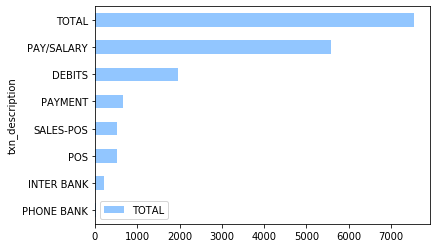

In [51]:
pd.DataFrame(agg_amount.iloc[-1,:].sort_values()/df['customer_id'].nunique()/df['month'].nunique()).plot(kind='barh')

10 top spender customers

In [52]:
agg_amount.sort_values(by='DEBITS', ascending=False).head(11)/df['month'].nunique()

txn_description,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,TOTAL,DEBITS
customer_id,,,,,,,,
TOTAL,21443.666667,558858.950000,67264.666667,3572.0,50953.746667,52335.036667,754428.066667,195569.116667
CUS-1271030853,406.333333,5404.700000,647.000000,NaN,2748.023333,487.203333,9693.260000,4288.560000
CUS-2738291516,163.000000,11027.293333,1777.333333,NaN,245.920000,1922.840000,15136.386667,4109.093333
CUS-51506836,1264.666667,4016.326667,846.000000,NaN,1118.100000,788.490000,8033.583333,4017.256667
CUS-2487424745,178.666667,4730.460000,555.000000,NaN,1610.323333,1662.746667,8737.196667,4006.736667
CUS-4142663097,262.000000,8207.756667,1328.666667,NaN,878.743333,1518.916667,12196.083333,3988.326667
CUS-325142416,1224.333333,5382.136667,306.666667,NaN,574.296667,1673.570000,9161.003333,3778.866667
CUS-2142601169,NaN,4342.563333,327.666667,NaN,2212.043333,1016.543333,7898.816667,3556.253333
CUS-1617121891,618.000000,7767.130000,664.333333,NaN,1247.820000,731.300000,11028.583333,3261.453333


10 top earning customers

In [53]:
agg_amount.sort_values(by='PAY/SALARY', ascending=False).head(11)/df['month'].nunique()

txn_description,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,TOTAL,DEBITS
customer_id,,,,,,,,
TOTAL,21443.666667,558858.950000,67264.666667,3572.000000,50953.746667,52335.036667,754428.066667,195569.116667
CUS-1816693151,257.000000,11781.306667,907.333333,NaN,193.693333,265.846667,13405.180000,1623.873333
CUS-3142625864,944.333333,11214.710000,951.333333,NaN,698.110000,420.946667,14229.433333,3014.723333
CUS-2738291516,163.000000,11027.293333,1777.333333,NaN,245.920000,1922.840000,15136.386667,4109.093333
CUS-2155701614,374.000000,10587.373333,1376.666667,82.000000,170.983333,56.906667,12647.930000,2060.556667
CUS-261674136,NaN,10279.033333,915.666667,186.333333,255.633333,625.376667,12262.043333,1983.010000
CUS-2031327464,385.000000,9881.560000,1204.000000,NaN,180.196667,293.566667,11944.323333,2062.763333
CUS-527400765,305.666667,9837.426667,890.666667,164.000000,474.273333,509.170000,12181.203333,2343.776667
CUS-3336454548,564.000000,9641.870000,696.000000,84.000000,221.016667,133.280000,11340.166667,1698.296667


10 top high avg balance customers

In [54]:
df.groupby('customer_id').agg('mean')[['balance', 'debit', 'credit']].sort_values(by='balance', ascending=False).head(10)

,balance,debit,credit
customer_id,,,
CUS-2370108457,263753.766119,103.383731,195.220299
CUS-527400765,198565.143775,46.565099,195.445563
CUS-2819545904,111300.797619,89.629524,359.028889
CUS-1816693151,65420.404231,62.456667,453.127179
CUS-3117610635,61491.350647,46.833381,117.345755
CUS-495599312,57566.579032,95.837419,597.795484
CUS-1609060617,56685.795802,77.167037,211.462222
CUS-1646183815,54240.641471,42.829706,276.148235
CUS-3462882033,46338.733837,42.227093,222.907674


Frequency of transaction types per customer

In [55]:
agg_freq = pd.crosstab(df.customer_id, df.txn_description, values=df.amount, aggfunc='count', margins=True, margins_name='TOTAL FREQ')
agg_freq

txn_description,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,TOTAL FREQ
customer_id,,,,,,,
CUS-1005756958,NaN,13.0,9.0,3.0,26.0,22.0,73
CUS-1117979751,1.0,7.0,40.0,NaN,26.0,26.0,100
CUS-1140341822,3.0,6.0,6.0,NaN,39.0,26.0,80
CUS-1147642491,2.0,13.0,27.0,NaN,38.0,38.0,118
CUS-1196156254,5.0,7.0,70.0,NaN,74.0,89.0,245
...,...,...,...,...,...,...,...
CUS-809013380,1.0,13.0,22.0,NaN,51.0,37.0,124
CUS-860700529,3.0,6.0,15.0,3.0,97.0,109.0,233
CUS-880898248,NaN,6.0,16.0,NaN,21.0,35.0,78


Average transaction frequency per customer per MONTH

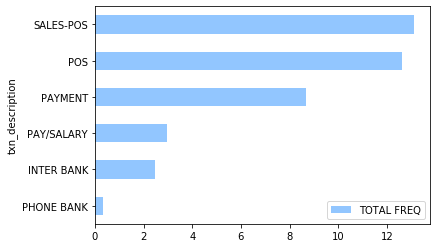

In [56]:
pd.DataFrame(agg_freq.iloc[-1,:-1].sort_values()
             /df['customer_id'].nunique()
             /df['month'].nunique()
            ).plot(kind='barh')

Variety of salary/wage frequency: monthly, biweekly, weekly, and in-between. Many values due to different days of payment.
Most customers get paid weekly

In [57]:
agg_freq.iloc[:-1,:]['PAY/SALARY'].value_counts()

6.0     28
13.0    27
7.0     24
14.0     8
12.0     5
2.0      4
4.0      2
3.0      1
5.0      1
Name: PAY/SALARY, dtype: int64

This is a typical bank statement of a customer

In [58]:
df[df['customer_id'] == 'CUS-1140341822'][['txn_description', 'balance', 'date', 'amount', 'movement', 'debit', 'credit']]

,txn_description,balance,date,amount,movement,debit,credit
115,POS,823.53,2018-08-01,9.21,debit,9.21,0.00
699,POS,777.17,2018-08-06,46.36,debit,46.36,0.00
1041,SALES-POS,773.08,2018-08-09,4.09,debit,4.09,0.00
1161,SALES-POS,741.82,2018-08-09,31.26,debit,31.26,0.00
1253,PAY/SALARY,2658.33,2018-08-10,1916.51,credit,0.00,1916.51
...,...,...,...,...,...,...,...
11655,POS,6901.95,2018-10-28,15.09,debit,15.09,0.00
11661,POS,6875.96,2018-10-28,25.99,debit,25.99,0.00
11699,SALES-POS,6863.99,2018-10-28,11.97,debit,11.97,0.00
11884,SALES-POS,6840.44,2018-10-30,23.55,debit,23.55,0.00


Example of a customer with biweekly wage

In [59]:
df[(df['customer_id'] == 'CUS-1140341822') & (df['txn_description'] == 'PAY/SALARY')][['txn_description', 'balance', 'date', 'amount', 'movement', 'debit', 'credit']]

,txn_description,balance,date,amount,movement,debit,credit
1253,PAY/SALARY,2658.33,2018-08-10,1916.51,credit,0.0,1916.51
2956,PAY/SALARY,4170.52,2018-08-24,1916.51,credit,0.0,1916.51
4830,PAY/SALARY,5896.44,2018-09-07,1916.51,credit,0.0,1916.51
6699,PAY/SALARY,7136.00,2018-09-21,1916.51,credit,0.0,1916.51
8596,PAY/SALARY,7530.55,2018-10-05,1916.51,credit,0.0,1916.51
10457,PAY/SALARY,7658.48,2018-10-19,1916.51,credit,0.0,1916.51


## Monthly Txn

Monthly txn amount per types

In [60]:
month_amount = pd.pivot_table(data=df, index='txn_description', columns='month', 
                           values='amount', margins=True, margins_name='Total'
                             )
month_amount = month_amount.reindex(columns=['August', 'September', 'October'])
month_amount

month,August,September,October
txn_description,,,
INTER BANK,78.429167,92.741667,88.740458
PAY/SALARY,1878.571577,1899.248566,1917.466166
PAYMENT,66.514934,88.016148,77.914062
PHONE BANK,122.000000,123.121212,75.057143
POS,39.594396,35.788532,45.928860
SALES-POS,32.892636,49.742341,37.128536
Total,185.121867,182.045903,196.427323


In [61]:
avg_month_amount = np.mean(month_amount.iloc[-1,:])

Note unusual flux:
* Highest avg trx amount on October, largely due to increase in pay/salary amount

Text(0.5, 1.0, 'Average Monthly Amount of Transactions')

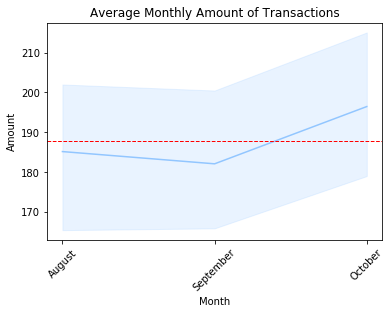

In [62]:
sns.lineplot(data=df, x='month', y='amount', sort=False)
plt.axhline(avg_month_amount, linestyle='dashed', color='r', linewidth=1)
plt.xticks(rotation='45')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Average Monthly Amount of Transactions')

Monthly txn freq per types

In [63]:
month_freq = pd.pivot_table(data=df, values='amount', index='txn_description', columns='month', aggfunc='count',
                           margins=True, margins_name='Total')
month_freq = month_freq.reindex(columns=['August', 'September', 'October'])
month_freq

month,August,September,October
txn_description,,,
INTER BANK,240,240,262
PAY/SALARY,298,272,313
PAYMENT,837,867,896
PHONE BANK,33,33,35
POS,1226,1294,1263
SALES-POS,1309,1307,1318
Total,3943,4013,4087


In [64]:
avg_month_freq = np.mean(month_freq.iloc[-1,:])

Linear growth of monthly txn freq

Movement in line with salary & payment

([<matplotlib.axis.XTick at 0xad8d590>,
 <a list of 3 Text xticklabel objects>)

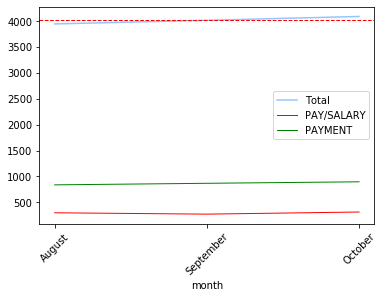

In [83]:
month_freq.iloc[-1,:].plot(legend='TOTAL')
plt.axhline(avg_month_freq, linestyle='dashed', color='r', linewidth=1)
month_freq.iloc[1,:].plot(kind='line', color='r', legend='PAY/SALARY', linewidth=1)
month_freq.iloc[2,:].plot(kind='line', color='g', legend='PAYMENT', linewidth=1)
plt.xticks(range(3), list(df['month'].unique()), rotation=45)

## Weekly txn

Weekly txn amount per types

In [66]:
week_amount = pd.pivot_table(data=df, values='amount', index='txn_description', columns='week',
                             margins=True, margins_name='Total')
week_amount

week,Week 31,Week 32,Week 33,Week 34,Week 35,Week 36,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Week 44,Total
txn_description,,,,,,,,,,,,,,,
INTER BANK,64.564103,89.571429,59.040000,83.561404,86.211538,89.473684,111.719298,109.724138,65.129630,75.767857,85.706897,96.300000,115.830769,31.695652,86.699461
PAY/SALARY,1805.537105,1925.066765,1869.501034,2019.022319,1731.627385,1925.066765,1832.280597,1966.508406,1871.164559,1880.985294,1731.627385,2149.056667,1915.218696,1867.229744,1898.728029
PAYMENT,63.761194,71.087629,68.108571,61.702703,70.765306,86.512195,95.582160,84.441176,86.484848,79.451456,85.441860,65.843137,91.895238,38.426230,77.613077
PHONE BANK,54.250000,90.444444,303.285714,78.375000,44.333333,71.111111,44.333333,268.800000,64.000000,99.500000,44.333333,74.125000,78.375000,48.666667,106.099010
POS,53.218777,44.291811,35.222152,30.577409,34.831197,40.407162,37.158106,34.165288,32.562996,34.866327,54.749682,65.667310,34.733925,29.541068,40.407412
SALES-POS,38.167636,30.300397,33.350899,30.969500,35.277692,52.171531,45.062483,48.968862,55.466437,32.107714,34.812757,36.668252,46.611828,33.931262,39.909789
Total,151.315346,191.737796,180.216372,189.795859,162.706660,194.403141,186.912108,198.120488,187.498859,179.005933,174.715065,217.294899,196.041241,248.730753,187.933588


In [67]:
avg_week_amount = np.mean(week_amount.iloc[-1,:-1])

Note unusual flux:
* Under-avg: Week 31(!), Week 35
* Exceed-avg: Week 42, Week 44(!)
* Biggest mvt: Week 44 saw 26.88% increase from Week 43

Text(0.5, 1.0, 'Average Weekly Amount of Transactions')

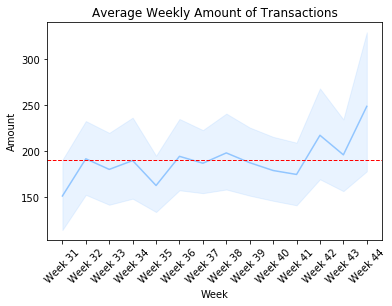

In [68]:
sns.lineplot(data=df, x='week', y='amount')
plt.axhline(avg_week_amount, linestyle='dashed', color='r', linewidth=1)
plt.xticks(rotation='45')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.title('Average Weekly Amount of Transactions')

Weekly txn freq per types

In [69]:
week_freq = pd.pivot_table(data=df, values='amount', index='txn_description', columns='week', aggfunc='count',
                           margins=True, margins_name='Total')
week_freq

week,Week 31,Week 32,Week 33,Week 34,Week 35,Week 36,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Week 44,Total
txn_description,,,,,,,,,,,,,,,
INTER BANK,39,56,50,57,52,57,57,58,54,56,58,60,65,23,742
PAY/SALARY,38,68,58,69,65,68,67,69,68,68,65,72,69,39,883
PAYMENT,134,194,175,185,196,205,213,204,198,206,215,204,210,61,2600
PHONE BANK,4,9,7,8,6,9,6,10,7,10,6,8,8,3,101
POS,229,265,223,301,309,303,301,312,277,294,283,290,293,103,3783
SALES-POS,220,302,278,300,312,294,286,290,334,315,301,309,290,103,3934
Total,664,894,791,920,940,936,930,943,938,949,928,943,935,332,12043


In [70]:
avg_week_freq = np.mean(week_freq.iloc[-1,:-1])

Suprisingly low txn freq at Week 44, when txn amount peaks

Movement in line with payments, pos, sales-pos

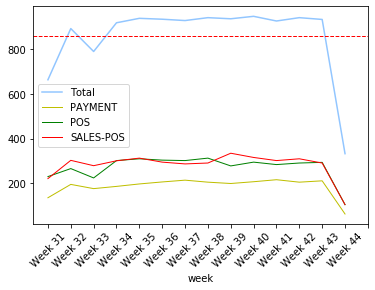

In [71]:
week_freq.iloc[-1,:-1].plot(legend='TOTAL')
week_freq.iloc[2,:-1].plot(kind='line', color='y', legend='PAYMENT', linewidth=1)
week_freq.iloc[4,:-1].plot(kind='line', color='g', legend='POS', linewidth=1)
week_freq.iloc[5,:-1].plot(kind='line', color='r', legend='SALES-POS', linewidth=1)
plt.axhline(avg_week_freq, linestyle='dashed', color='r', linewidth=1)
plt.xticks(range(15), list(df['week'].unique()), rotation=45)
plt.legend(loc='best')

## Day-of-week Txn

Day-of-week txn amount per types

In [72]:
day_amount = pd.pivot_table(data=df, values='amount', index='txn_description', columns='day',
                             margins=True, margins_name='Total')
day_amount = day_amount.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_amount

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
txn_description,,,,,,,
INTER BANK,78.845528,60.917160,81.080460,95.500000,105.903226,96.663934,113.989899
PAY/SALARY,1595.270813,1789.362093,1704.373497,2127.712338,NaN,NaN,2136.075604
PAYMENT,81.594203,75.789116,78.088235,65.995745,89.085034,73.515152,85.733119
PHONE BANK,87.055556,59.466667,59.576923,140.200000,264.687500,140.600000,177.000000
POS,42.010773,37.674286,40.231012,40.860702,40.565276,46.670563,32.906102
SALES-POS,40.827635,41.259661,40.579226,34.919789,43.156204,38.733811,40.307088
Total,221.576456,195.215570,184.010422,249.353517,54.419286,53.015845,373.221000


In [73]:
avg_day_amount = np.mean(day_amount.iloc[-1,:])

Highest txn amount on Sunday and lowest on Friday & Saturday, mostly due to salary

Text(0.5, 1.0, 'Average Daily Amount of Transactions')

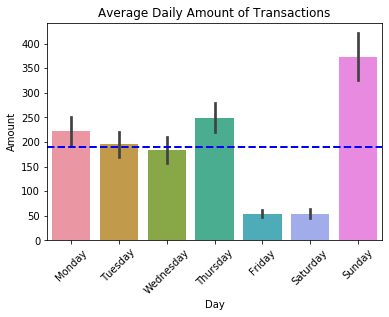

In [74]:
sns.barplot(data=df, x='day', y='amount', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.axhline(avg_day_amount, linestyle='dashed', color='b', linewidth=2)
plt.xticks(rotation='45')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Average Daily Amount of Transactions')

Day-of-week txn freq per types

In [75]:
day_freq = pd.pivot_table(data=df, values='amount', index='txn_description', columns='day', aggfunc='count',
                           margins=True, margins_name='Total')
day_freq = day_freq.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_freq

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
txn_description,,,,,,,
INTER BANK,123.0,169.0,87.0,80.0,62.0,122.0,99.0
PAY/SALARY,160.0,172.0,143.0,201.0,NaN,NaN,207.0
PAYMENT,345.0,441.0,442.0,470.0,294.0,297.0,311.0
PHONE BANK,18.0,30.0,26.0,5.0,16.0,5.0,1.0
POS,414.0,602.0,573.0,655.0,652.0,533.0,354.0
SALES-POS,427.0,649.0,530.0,662.0,685.0,593.0,388.0
Total,1487.0,2063.0,1801.0,2073.0,1709.0,1550.0,1360.0


In [76]:
avg_day_freq = np.mean(day_freq.iloc[-1,:])

Sunday is high amount low freq day

Busiest days freq-wise are Tuesday, Thursday but the amounts are just average

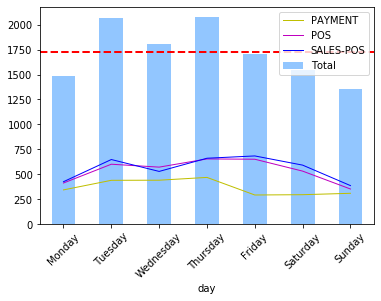

In [77]:
day_freq.iloc[-1,:].plot(kind='bar', legend='TOTAL')
day_freq.iloc[2,:].plot(kind='line', color='y', legend='PAYMENT', linewidth=1)
day_freq.iloc[4,:].plot(kind='line', color='m', legend='POS', linewidth=1)
day_freq.iloc[5,:].plot(kind='line', color='b', legend='SALES-POS', linewidth=1)
plt.axhline(avg_day_freq, linestyle='dashed', color='r', linewidth=2)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.legend(loc='best')

In [86]:
daily_amount = df.groupby(by=['date', 'day']).agg('mean')[['amount', 'debit', 'credit']]
daily_amount

,,amount,debit,credit
date,day,,,
2018-08-01,Tuesday,218.014161,40.484964,177.529197
2018-08-02,Wednesday,143.331053,49.724276,93.606776
2018-08-03,Thursday,242.653376,51.184076,191.469299
2018-08-04,Friday,53.356356,53.356356,0.000000
2018-08-05,Saturday,44.265000,44.265000,0.000000
...,...,...,...,...
2018-10-27,Friday,50.155252,50.155252,0.000000
2018-10-28,Saturday,59.007762,59.007762,0.000000
2018-10-29,Sunday,377.932745,24.697843,353.234902


Text(0.5, 1.0, 'Daily Transaction Amounts during August-October 2018')

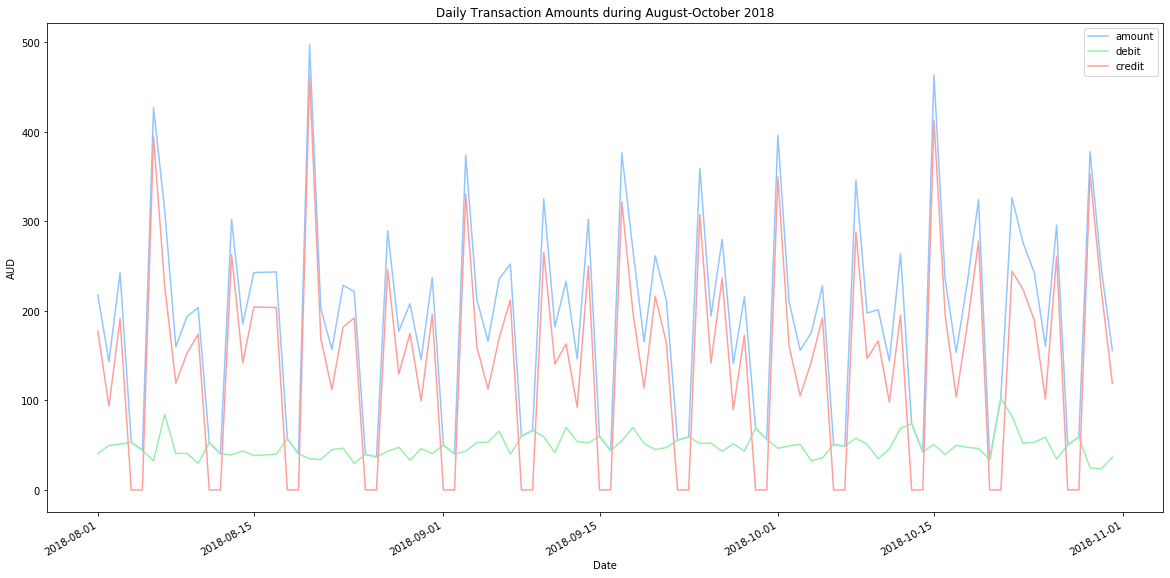

In [84]:
plt.figure(figsize=(20,10))
for i, k in zip(range(3), ['amount', 'debit', 'credit']):
    daily_amount.iloc[:,i].plot(legend=k)
plt.xlabel('Date')
plt.ylabel('AUD')
plt.title('Daily Transaction Amounts during August-October 2018')

In [80]:
daily_freq = df.groupby(by='date').agg('count')['amount']
daily_freq

date
2018-08-01    137
2018-08-02    152
2018-08-03    157
2018-08-04    118
2018-08-05    100
             ... 
2018-10-27    139
2018-10-28    143
2018-10-29    102
2018-10-30     89
2018-10-31    141
Name: amount, Length: 91, dtype: int64

Text(0.5, 1.0, 'Daily Transaction Frequency during August-October 2018')

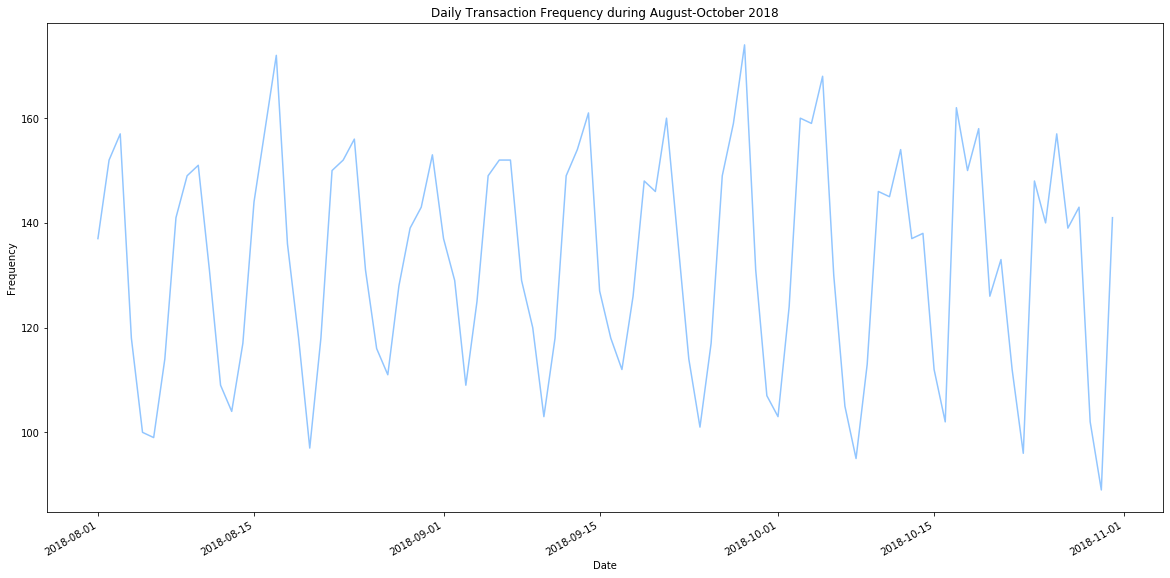

In [85]:
plt.figure(figsize=(20,10))
daily_freq.plot()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Daily Transaction Frequency during August-October 2018')

# Conclusion